
# **Árvore de Decisão - Regressão**

A Árvore de Decisão é uma ferramenta de tomada de decisão que usa uma estrutura de árvore semelhante a um fluxograma ou é um modelo de decisões, incluindo resultados, custos de entrada e utilidade. O algoritmo de árvore de decisão se enquadra na categoria de algoritmos de **aprendizado supervisionado**. Funciona para variáveis de saída contínuas e categóricas.

Este modelo divide um conjunto de dados em subconjuntos cada vez menores enquanto, ao mesmo tempo, uma árvore de decisão associada é desenvolvida de forma incremental. 

Os nós podem representar as condições ou os  resultados. As condições pode ser verdadeiras ou falsas, de acordo com as condições dos dados de entrada.

As árvores de decisão podem ser aplicadas para classificação ou para regressão. 
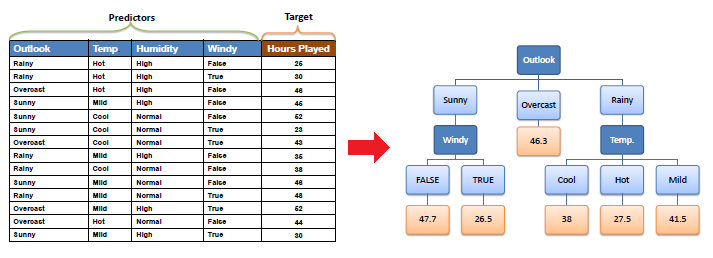


# Exemplo

### Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importando os dados

In [2]:
ds = pd.read_csv("decision-tree-regression-dataset.csv",sep=";",header = None)
 
X = ds.iloc[:,0].values.reshape(-1,1)

y= ds.iloc[:,1].values.reshape(-1,1)


## Treinamento

In [3]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(random_state = 0, max_depth=5)
modelo.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=0)

## Prevendo o resultado

In [4]:
y_pred = modelo.predict([[25000]])
print(y_pred)

[5.]


## Visualizando os resultados

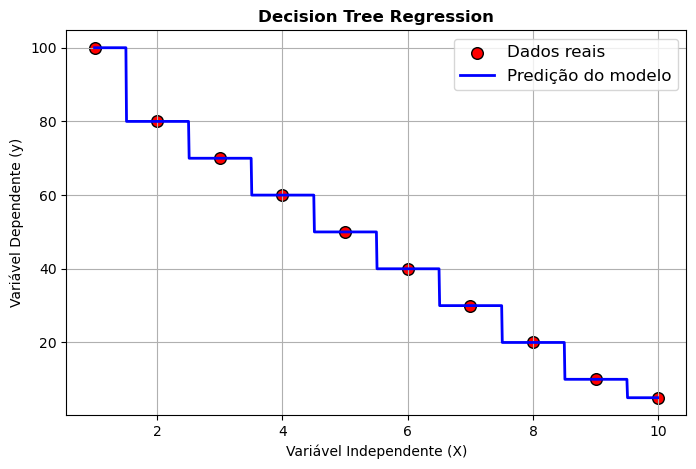

In [5]:
# Definir os dados
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Criar a figura e definir o tamanho
plt.figure(figsize=(8, 5))

# Plotar os pontos de dados
plt.scatter(X, y, color='red', label='Dados reais', s=70, edgecolor='black')

# Plotar a curva de predição
plt.plot(X_grid, modelo.predict(X_grid), color='blue', label='Predição do modelo', linewidth=2)

# Títulos e rótulos
plt.title('Decision Tree Regression', fontsize=12, fontweight='bold')
plt.xlabel('Variável Independente (X)', fontsize=10)
plt.ylabel('Variável Dependente (y)', fontsize=10)

# Legenda
plt.legend(loc='upper right', fontsize=12)

# Grid para facilitar a visualização
plt.grid(True)

# Exibir o gráfico
plt.show()


### Gerando e Visualizando a Estrutura da Árvore

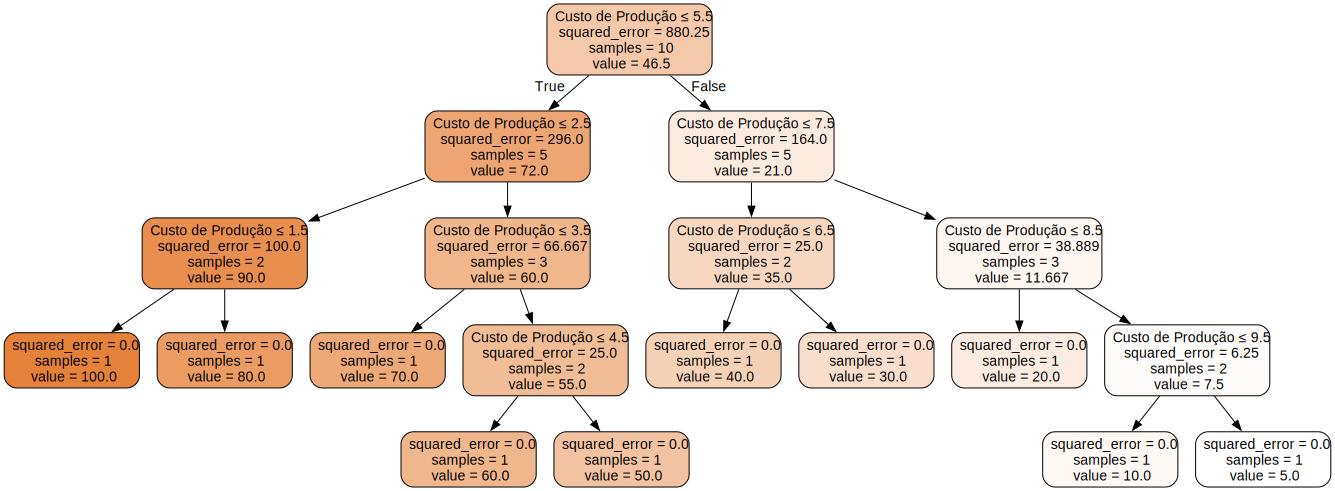

In [14]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image  

# Gerando a árvore em formato dot e visualizando diretamente
dot_data = export_graphviz(modelo, 
                           out_file=None, 
                           feature_names=['Custo de Produção'], 
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Exibir o gráfico diretamente
graph = Source(dot_data)
graph.render('tree')  # Salva como arquivo 'tree.pdf'
graph